# Telco Customer Churn Prediction Using PyCaret

#### https://pycaret.org/setup/

In [47]:
# toolboxes/libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes=True)

from sklearn.metrics import *

import sys

# Pycaret 
!{sys.executable} -m pip install pycaret
from pycaret.classification import *

# Handle imbalanced dataset in supervised learning
# https://www.datasciencecentral.com/profiles/blogs/handling-imbalanced-data-sets-in-supervised-learning-using-family
# conda install -c glemaitre imbalanced-learn
# for python[version='2.7.*|3.4.*|3.5.*|3.6.*']
!{sys.executable} -m pip install imbalanced-learn
from imblearn.over_sampling import SMOTE, ADASYN

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [48]:
from platform import python_version
print('This Python version is: ', python_version())
import imblearn
print('Imbalanced learn version is: ',imblearn.__version__)
print('PyCaret version is: ',pycaret.__version__)

This Python version is:  3.6.13
Imbalanced learn version is:  0.7.0
PyCaret version is:  2.3.4


In [3]:
# import data set
url = 'https://raw.githubusercontent.com/santamm/telecom-customer-churn-prediction/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# note:
# There're 11 rows that 'TotalCharge' are blanks, causing 'TotalCharge' datatype read as 'object' when importing

df = pd.read_csv(url, sep=',', na_values=[" "])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# change the data type to catgory

df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [5]:
# drop any na
df=df.dropna()
print('The dataset has', df.shape[0] , 'rows and', df.shape[1], 'columns.')

The dataset has 7032 rows and 21 columns.


In [6]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2190,5003-XZWWO,Male,0,Yes,No,71,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.20,5956.85,No
1722,9060-HJJRW,Female,0,No,No,51,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),56.40,2928.50,No
5014,3528-HFRIQ,Male,1,Yes,No,71,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),52.30,3765.05,No
5198,0643-OKLRP,Female,1,Yes,No,47,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,80.35,3825.85,Yes
882,3908-BLSYF,Female,0,No,No,6,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,83.90,497.55,Yes
3028,8740-XLHDR,Male,0,No,No,5,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,43.25,219.00,Yes
3573,6506-EYCNH,Female,0,Yes,Yes,28,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.55,543.80,No
2911,9747-DDZOS,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),73.50,73.50,Yes
3518,8393-JMVMB,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.45,19.45,No
1154,8292-ITGYJ,Female,0,Yes,Yes,45,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.65,1138.80,No


## Data Preparation

In [7]:
# prepare the dataset
df2 = df.drop(columns=['customerID'])
target = df2['Churn'].map({'Yes': 1, 'No': 0})
features = df2.drop('Churn', axis=1)

In [8]:
# split the dataset into numeric and objects to facilitate the analysis
numerics = ['float64', 'int64']
numeric_ds = features.select_dtypes(include=numerics)
objects_ds = features.select_dtypes(exclude=numerics)

In [9]:
#Let's convert all the categorical variables into dummy variables
objects_dummies = pd.get_dummies(objects_ds)
objects_dummies.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [10]:
#standardize the numberic values
normalized_df=(numeric_ds - numeric_ds.mean()) / numeric_ds.std()
numeric_ds_2 = numeric_ds.drop(['tenure','MonthlyCharges','TotalCharges'], 1)
numeric_ds_2 = pd.concat([numeric_ds_2, normalized_df],axis=1)
numeric_ds_2.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280157,-1.161611,-0.994123
1,0.064298,-0.260859,-0.173727
2,-1.239416,-0.363897,-0.959581
3,0.512450,-0.747797,-0.195234
4,-1.239416,0.196164,-0.940391


In [11]:
features_2 = pd.concat([numeric_ds_2,objects_dummies],axis=1)
features_2.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.280157,-1.161611,-0.994123,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0.064298,-0.260859,-0.173727,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,-1.239416,-0.363897,-0.959581,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0.512450,-0.747797,-0.195234,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,-1.239416,0.196164,-0.940391,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


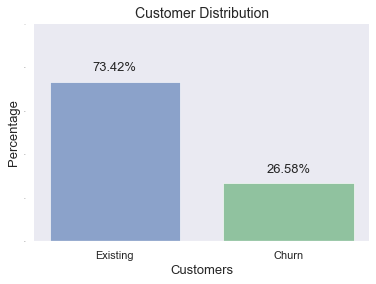

In [12]:
# https://github.com/ShivaliPatel/Data-science-projects/blob/master/Telco_customer_churn/Notebooks/Telecom%20Churn%20Prediction-v2.ipynb

def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=['b','g','r','m','c', 'y']):
    """ Based on x and y value, generate bar graph """
   
    fig, ax = plt.subplots()
    ax.bar(range(len(x))
       , y
       , width = 0.75
       , color=color
        , alpha = 0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    
    plt.show()


#----------------------------------------------------------------------
# Distribution in train dataset

Churn_rate = pd.value_counts(target) / len(target)
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

#### Since the churn rate is about much less than in the overall dataset, we will apply the class balancing technique to handle the imbalance.
#### We'll go with ADASYN over SMOTE as SMOTE will introduce some more noise into dataset comparing to ADASYN
#### For more details, refer to the article on https://www.datasciencecentral.com/profiles/blogs/handling-imbalanced-data-sets-in-supervised-learning-using-family

In [13]:
X = features_2
y = target

adasyn = ADASYN(random_state = 42)
X_adasyn, y_adasyn = adasyn.fit_sample(X, y)


print("----------------------------")
print("Original x train shape, ", X.shape)
print("Resample x train shape, ", X_adasyn.shape)
print("----------------------------")

from collections import Counter
print('Class Balance count : ',Counter(y_adasyn))

----------------------------
Original x train shape,  (7032, 46)
Resample x train shape,  (10305, 46)
----------------------------
Class Balance count :  Counter({0: 5163, 1: 5142})


In [14]:
pycaret_ds = pd.concat([X_adasyn, y_adasyn],axis=1)
pycaret_ds.sample(5)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
394,0.390227,1.005511,0.732848,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0
4457,-0.057925,-0.490202,-0.335235,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
5101,1.368012,0.034960,0.800147,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
9853,-1.160138,-1.337617,-0.971946,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1
9501,0.841113,1.394351,1.540679,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1


In [15]:
print("Original dataset, ", pycaret_ds.shape)

Original dataset,  (10305, 47)


In [16]:
# https://github.com/YuehHanChen/Telco_Customer_Churn_Analysis/blob/master/Telco_Customer_Churn_Analysis.ipynb
## Dataset Sampling 
def data_sampling(dataset, frac: float, random_seed: int): 
    data_sampled_a = dataset.sample(frac=frac, random_state=random_seed) 
    data_sampled_b = dataset.drop(data_sampled_a.index).reset_index(drop=True) 
    data_sampled_a.reset_index(drop=True, inplace=True) 
    return data_sampled_a, data_sampled_b 

data, data_unseen = data_sampling(pycaret_ds, 0.9, 42) 

print(f"There are {data_unseen.shape[0]} samples for Unseen Data.")

There are 1031 samples for Unseen Data.


In [17]:
ml_clf = setup(data=data, target="Churn", 
               session_id= 42, 
               feature_selection=True, 
               remove_outliers=True, 
               remove_multicollinearity=True, 
               transformation=True, 
               ignore_low_variance=True, 
               pca=True)

,Description,Value
0,session_id,42
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9274, 47)"
5,Missing Values,False
6,Numeric Features,46
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
# just consider the best model
compare_models(fold=10)

# condsider top 3 models
# top3 = compare_models(fold=10, n_select = 3)
# tuned_top3 = [tune_model(i) for i in top3]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8394,0.9249,0.8362,0.8520,0.8438,0.6787,0.6792,1.3790
lightgbm,Light Gradient Boosting Machine,0.8318,0.9212,0.8168,0.8536,0.8344,0.6637,0.6650,0.1910
rf,Random Forest Classifier,0.8317,0.9166,0.8028,0.8635,0.8318,0.6638,0.6659,0.7980
svm,SVM - Linear Kernel,0.8308,0.0000,0.8212,0.8500,0.8344,0.6616,0.6636,0.0170
ada,Ada Boost Classifier,0.8305,0.9175,0.8275,0.8435,0.8351,0.6608,0.6614,0.3470
lr,Logistic Regression,0.8294,0.9176,0.8284,0.8407,0.8342,0.6585,0.6590,0.3520
xgboost,Extreme Gradient Boosting,0.8279,0.9149,0.8168,0.8468,0.8311,0.6558,0.6569,1.2590
et,Extra Trees Classifier,0.8273,0.9031,0.7962,0.8609,0.8269,0.6551,0.6576,0.4260
ridge,Ridge Classifier,0.8185,0.0000,0.8187,0.8294,0.8238,0.6367,0.6371,0.0120
lda,Linear Discriminant Analysis,0.8185,0.9076,0.8181,0.8298,0.8237,0.6368,0.6371,0.0180


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### The best model suggested by PyCaret is the Gradient Booting classifier (GBC)

In [19]:
# Let's stick with GBC and create the model.
base_alg = "gbc" 
base_model = create_model(base_alg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8314,0.9151,0.8562,0.8253,0.8405,0.6619,0.6624
1,0.8444,0.9317,0.8312,0.8636,0.8471,0.6888,0.6894
2,0.8412,0.9216,0.8500,0.8447,0.8474,0.6818,0.6818
3,0.8298,0.9200,0.8219,0.8457,0.8336,0.6595,0.6598
4,0.8185,0.9084,0.8031,0.8399,0.8211,0.6371,0.6377
5,0.8606,0.9450,0.8469,0.8799,0.8631,0.7212,0.7218
6,0.8231,0.9279,0.8464,0.8182,0.8320,0.6452,0.6456
7,0.8409,0.9200,0.8156,0.8700,0.8419,0.6821,0.6836
8,0.8263,0.9085,0.8031,0.8538,0.8277,0.6529,0.6541
9,0.8782,0.9510,0.8875,0.8793,0.8834,0.7560,0.7561


In [20]:
# see the hyper-parameters used for build the base model.
plot_model(base_model, plot="parameter")

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,deviance
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None


In [21]:
# to tune the base model and optmize a metric
tuned_model = tune_model(base_model, fold=10, optimize="AUC")  # for imbalance dataset use F1 Score to optiize

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5186,0.9174,1.0000,0.5186,0.6830,0.0000,0.0000
1,0.5186,0.9328,1.0000,0.5186,0.6830,0.0000,0.0000
2,0.5186,0.9212,1.0000,0.5186,0.6830,0.0000,0.0000
3,0.5186,0.9233,1.0000,0.5186,0.6830,0.0000,0.0000
4,0.5186,0.9105,1.0000,0.5186,0.6830,0.0000,0.0000
5,0.5186,0.9486,1.0000,0.5186,0.6830,0.0000,0.0000
6,0.5179,0.9273,1.0000,0.5179,0.6824,0.0000,0.0000
7,0.5195,0.9200,1.0000,0.5195,0.6838,0.0000,0.0000
8,0.5195,0.9128,1.0000,0.5195,0.6838,0.0000,0.0000
9,0.5195,0.9521,1.0000,0.5195,0.6838,0.0000,0.0000


In [22]:
plot_model(tuned_model, plot="parameter")

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.0001
loss,deviance
max_depth,9
max_features,sqrt
max_leaf_nodes,None
min_impurity_decrease,0.3
min_impurity_split,None


In [23]:
bagged_model = ensemble_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5186,0.9168,1.0000,0.5186,0.6830,0.0000,0.0000
1,0.5186,0.9324,1.0000,0.5186,0.6830,0.0000,0.0000
2,0.5186,0.9198,1.0000,0.5186,0.6830,0.0000,0.0000
3,0.5186,0.9227,1.0000,0.5186,0.6830,0.0000,0.0000
4,0.5186,0.9096,1.0000,0.5186,0.6830,0.0000,0.0000
5,0.5186,0.9496,1.0000,0.5186,0.6830,0.0000,0.0000
6,0.5179,0.9290,1.0000,0.5179,0.6824,0.0000,0.0000
7,0.5195,0.9194,1.0000,0.5195,0.6838,0.0000,0.0000
8,0.5195,0.9117,1.0000,0.5195,0.6838,0.0000,0.0000
9,0.5195,0.9531,1.0000,0.5195,0.6838,0.0000,0.0000


In [24]:
boosted_model = ensemble_model(tuned_model, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5186,0.5000,1.0000,0.5186,0.6830,0.0000,0.0000
1,0.5186,0.5000,1.0000,0.5186,0.6830,0.0000,0.0000
2,0.5186,0.5000,1.0000,0.5186,0.6830,0.0000,0.0000
3,0.5186,0.5000,1.0000,0.5186,0.6830,0.0000,0.0000
4,0.5186,0.5000,1.0000,0.5186,0.6830,0.0000,0.0000
5,0.5186,0.5000,1.0000,0.5186,0.6830,0.0000,0.0000
6,0.5179,0.5000,1.0000,0.5179,0.6824,0.0000,0.0000
7,0.5195,0.5000,1.0000,0.5195,0.6838,0.0000,0.0000
8,0.5195,0.5000,1.0000,0.5195,0.6838,0.0000,0.0000
9,0.5195,0.5000,1.0000,0.5195,0.6838,0.0000,0.0000


In [25]:
blended_model = blend_models(estimator_list=[tuned_model, bagged_model], method="soft")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5186,0.9172,1.0000,0.5186,0.6830,0.0000,0.0000
1,0.5186,0.9327,1.0000,0.5186,0.6830,0.0000,0.0000
2,0.5186,0.9207,1.0000,0.5186,0.6830,0.0000,0.0000
3,0.5186,0.9232,1.0000,0.5186,0.6830,0.0000,0.0000
4,0.5186,0.9100,1.0000,0.5186,0.6830,0.0000,0.0000
5,0.5186,0.9490,1.0000,0.5186,0.6830,0.0000,0.0000
6,0.5179,0.9282,1.0000,0.5179,0.6824,0.0000,0.0000
7,0.5195,0.9199,1.0000,0.5195,0.6838,0.0000,0.0000
8,0.5195,0.9125,1.0000,0.5195,0.6838,0.0000,0.0000
9,0.5195,0.9528,1.0000,0.5195,0.6838,0.0000,0.0000


In [26]:
stacked_model = stack_models([tuned_model, bagged_model], method="auto")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8282,0.9107,0.8531,0.8223,0.8374,0.6554,0.6559
1,0.8250,0.9162,0.8156,0.8419,0.8286,0.6499,0.6502
2,0.8201,0.9177,0.8312,0.8235,0.8274,0.6396,0.6396
3,0.8136,0.9046,0.8031,0.8317,0.8172,0.6272,0.6276
4,0.8039,0.9021,0.7875,0.8262,0.8064,0.6079,0.6087
5,0.8720,0.9443,0.8750,0.8777,0.8764,0.7436,0.7436
6,0.8231,0.9206,0.8433,0.8201,0.8315,0.6453,0.6456
7,0.8344,0.9160,0.8188,0.8562,0.8371,0.6689,0.6696
8,0.8247,0.9084,0.7938,0.8581,0.8247,0.6499,0.6519
9,0.8539,0.9396,0.8750,0.8485,0.8615,0.7070,0.7074


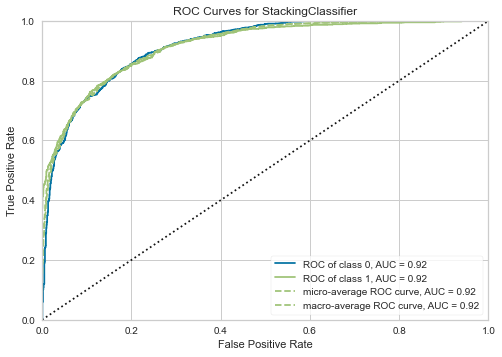

In [27]:
# The best model is stacked model, improve f1 but a bit lower on AUC when compare blended_model
best_model = stacked_model 
plot_model(best_model, plot="auc")

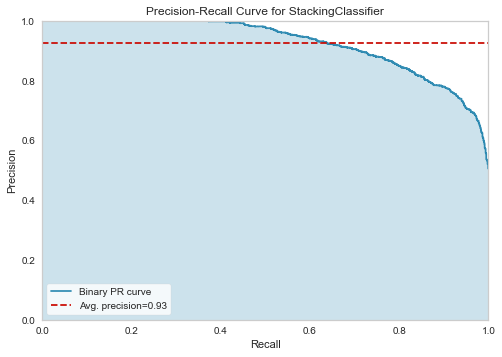

In [28]:
# Precision Recall Curve
plot_model(best_model, plot = 'pr')

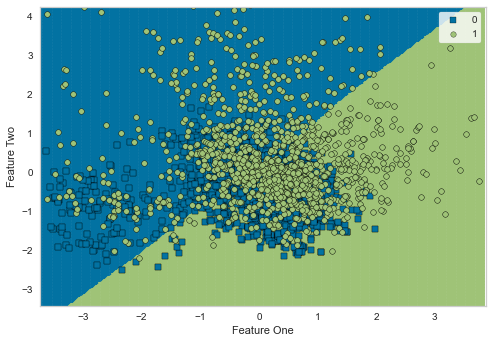

In [29]:
# Decision Boundary
plot_model(best_model, plot = 'boundary')

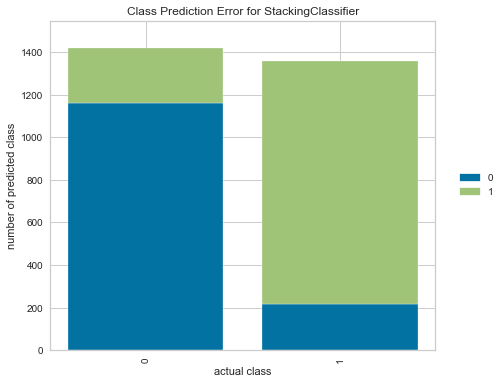

In [30]:
plot_model(best_model, plot = 'error')

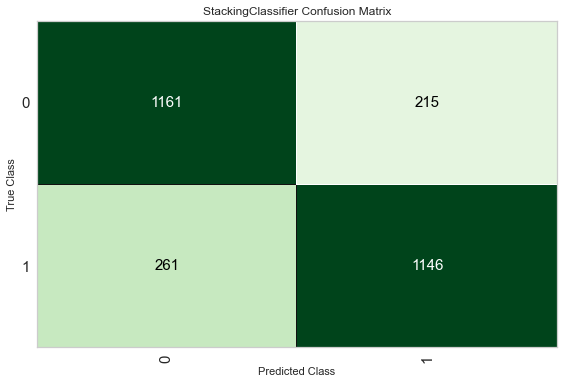

In [31]:
plot_model(best_model, plot = 'confusion_matrix')

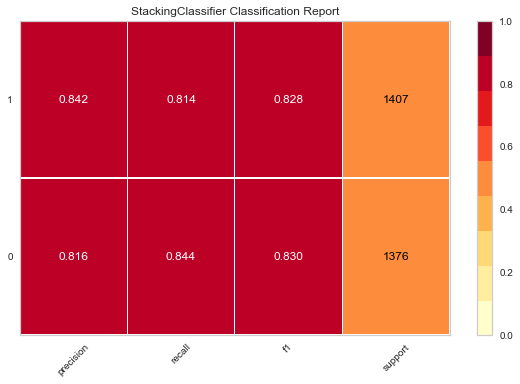

In [32]:
plot_model(best_model, plot = 'class_report')

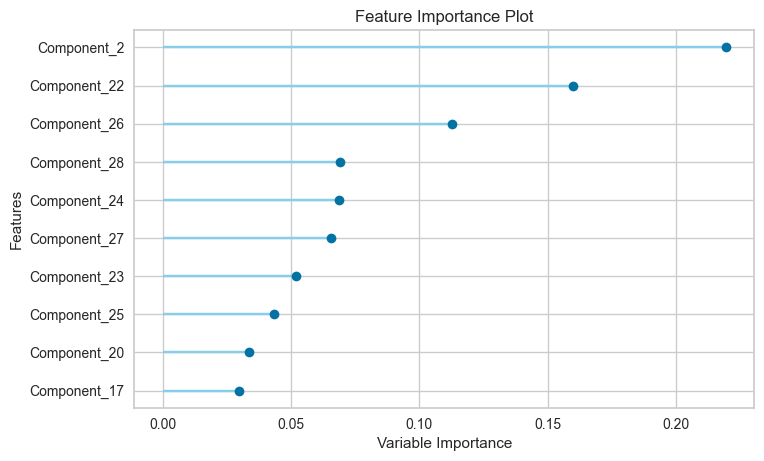

In [35]:
# Feature Importance for turned model
plot_model(tuned_model, plot = 'feature')

In [38]:
# This function only supports tree based models for binary classification: xgboost, rf, dt, et, lightgbm.
# interpret_model(tuned_model)  

### Prediction on Test Data

In [39]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.8290,0.9172,0.8145,0.8420,0.8280,0.6580,0.6584


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_22,Component_23,Component_24,Component_25,Component_26,Component_27,Component_28,Churn,Label,Score
0,2.025371,-0.349949,-0.974497,0.746307,0.291564,0.190798,0.623547,0.353371,-0.621840,0.582069,...,0.121316,-0.035803,-0.016970,0.213325,0.042821,0.593397,-0.303913,1,1,0.9424
1,-1.688993,-0.092643,0.621914,1.104135,0.388145,0.518144,-0.803910,-0.528677,0.999702,0.065156,...,0.314045,0.074247,-0.248927,-0.187018,-0.184815,0.048394,-0.226291,1,1,0.9944
2,-2.424967,-0.240896,1.023956,-0.069878,-0.749689,0.290295,-0.147610,0.954126,0.353759,-0.371816,...,0.308715,0.052144,-0.525354,-0.081482,-0.143049,0.091997,0.095480,1,1,0.9998
3,-0.963921,-1.445828,0.041739,-0.178455,-0.670130,-0.233089,-0.385016,-1.326251,0.656006,0.117451,...,-0.066005,-0.010886,-0.003922,-0.020992,-0.003163,-0.019438,-0.010803,0,1,0.7006
4,-1.776289,-0.459489,1.070619,-0.624194,-0.429926,0.570371,0.461766,-0.587990,-0.226721,-0.237009,...,-0.037097,0.000640,0.001738,0.006847,-0.010254,-0.007988,-0.013011,1,0,0.5640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,3.417137,0.955808,0.126449,-0.696646,-0.345547,0.565368,-0.019862,-0.661005,-0.243829,-0.670265,...,-0.085199,-0.019456,0.007301,0.013936,0.004868,-0.024151,0.002095,0,0,0.9569
2779,-0.364942,-0.003454,-0.627324,-0.202587,0.794444,1.693868,1.499959,0.126471,0.002368,-0.238473,...,-0.119925,-0.035273,0.039272,-0.010318,0.021574,-0.048497,-0.022698,1,0,0.6395
2780,0.017847,1.452644,0.866786,1.109818,-1.282424,-0.106815,-0.275408,0.349283,0.756791,-0.054134,...,-0.133889,0.000966,-0.024495,0.027241,0.014941,0.003258,0.013786,0,0,0.9732
2781,-2.359681,-0.424212,0.530199,0.088804,-0.823179,0.675095,-0.443453,0.339309,0.099371,0.116638,...,-0.045426,0.002450,0.006438,-0.008466,0.024870,0.019988,-0.015802,1,0,0.5041


In [40]:
final_model = finalize_model(best_model)

### Prediction on Unseen Data

In [41]:
# https://github.com/YuehHanChen/Telco_Customer_Churn_Analysis/blob/master/Telco_Customer_Churn_Analysis.ipynb
from sklearn.preprocessing import LabelEncoder

# Calculate scores with Test/Unseen labeled data 
def test_score_report(data_unseen, predict_unseen): 
    le = LabelEncoder() 
    data_unseen["Label"] = le.fit_transform(data_unseen.Churn.values) 
    data_unseen["Label"] = data_unseen["Label"].astype(int) 
    accuracy = accuracy_score(data_unseen["Label"], predict_unseen["Label"]) 
    roc_auc = roc_auc_score(data_unseen["Label"], predict_unseen["Label"]) 
    precision = precision_score(data_unseen["Label"], predict_unseen["Label"]) 
    recall = recall_score(data_unseen["Label"], predict_unseen["Label"]) 
    f1 = f1_score(data_unseen["Label"], predict_unseen["Label"]) 
    
    df_unseen = pd.DataFrame({ "Accuracy" : [accuracy], 
                              "AUC" : [roc_auc], 
                              "Recall" : [recall], 
                              "Precision" : [precision], 
                              "F1 Score" : [f1] }) 
    return df_unseen

# Confusion Matrix 
def conf_mat(data_unseen, predict_unseen): 
    unique_label = data_unseen["Label"].unique() 
    cmtx = pd.DataFrame( 
        confusion_matrix(data_unseen["Label"], 
                         predict_unseen["Label"], 
                         labels=unique_label), 
        index=['{:}'.format(x) for x in unique_label], 
        columns=['{:}'.format(x) for x in unique_label] ) 
    ax = sns.heatmap(cmtx, annot=True, fmt="d", cmap="YlGnBu") 
    ax.set_ylabel('Predicted') 
    ax.set_xlabel('Target'); 
    ax.set_title("Predict Unseen Confusion Matrix", size=14);



 Accuracy      AUC    Recall  Precision  F1 Score
  0.86033  0.86039  0.857685   0.867562  0.862595


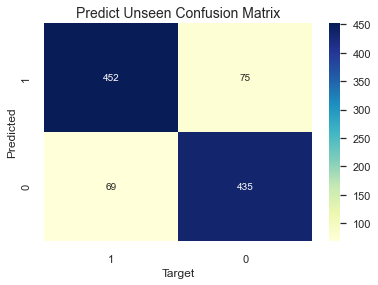

In [45]:
predict_unseen = predict_model(final_model, data=data_unseen); 
score_unseen = test_score_report(data_unseen, predict_unseen) 
print(score_unseen.to_string(index=False)) 
conf_mat(data_unseen, predict_unseen);

####  Accuracy and F1 Score both has 86%

#### https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2

#### To summarise the differences between the F1-score and the accuracy,
    Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial
    Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.
    In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.

In [46]:
# Save Experiment and Model
from datetime import date
#save_experiment("expGBC_"+date.today().strftime("%m-%d-%Y")) 
save_model(tuned_model, "modelGBC_"+ date.today().strftime("%m-%d-%Y"))


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                             loss='deviance', max_depth=9,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=

### PyCaret references:


https://towardsdatascience.com/how-to-use-pycaret-the-library-for-lazy-data-scientists-91343f960bd2

https://towardsdatascience.com/5-things-you-are-doing-wrong-in-pycaret-e01981575d2a

https://prog.world/introducing-pycaret-an-open-low-code-python-machine-learning-library/

https://towardsdatascience.com/machine-learning-made-easier-with-pycaret-907e7124efe6

https://towardsdatascience.com/pycaret-the-machine-learning-omnibus-part-2-87c7d0756f2b

https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb

https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb